In [5]:
import pandas as pd

In [2]:
#Veri analizi ve veri ön işleme

In [6]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#df["CRIM"]=df["CRIM"].fiilna(df["CRIM"].mean())
df=df.fillna(df.mean()) #Tüm satırlardaki boş alanları o sütunun ortalaması ile doldurur.

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [1]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Eğer denetimli öğrenme yapıyorsak veriyi "etiket-diğerleri" şeklinde bölmeliyiz
X=df.drop(columns=["MEDV"]) #girdi matrix
y=df["MEDV"] #çıktı vektörü

In [9]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [10]:
y[0]

np.float64(24.0)

In [11]:
X.shape

(506, 13)

In [14]:
#train test split
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [22]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [24]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
# MAE->ortalama mutlak sapma payı
mae=mean_absolute_error(y_test,y_pred)
mae

3.1410525671084324

In [37]:
#MSE->ortalama sapma değerlerinin karesi alınmış hali
mse=mean_squared_error(y_test,y_pred)
mse

21.818457953525854

In [38]:
#MSE->daha büyük sapmaları daha çok cezalandırmak
#değer 10
#ilk tahmin 8->2 birin->4 birim
#ikinci tahmin 25 ->15 birim->225 birim

In [39]:
import matplotlib.pyplot as plt

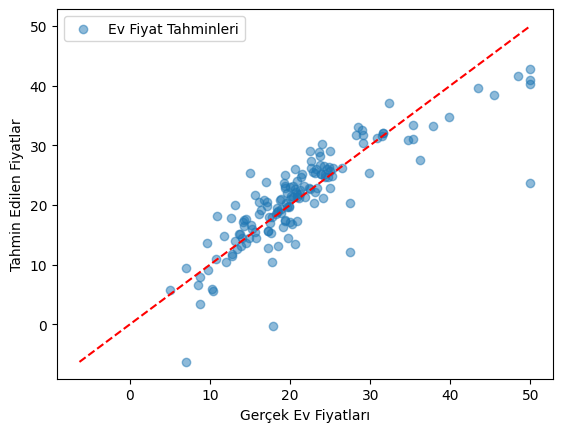

In [45]:
plt.scatter(y_test,y_pred,label="Ev Fiyat Tahminleri",alpha=0.5)
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Fiyatlar")

min_val=min(y_test.min(),y_pred.min())
max_val=max(y_test.max(),y_pred.max())

plt.plot([min_val,max_val],[min_val,max_val],color="red",linestyle="--")

plt.legend()
plt.show()


In [46]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [47]:
new_house = {
    "CRIM": 0.09,
    "ZN": 0.0,
    "INDUS":11.083992,
    "CHAS":0.0,
    "NOX":0.51,
    "RM": 6.417,
    "AGE":68.5,
    "DIS":2.64,
    "RAD": 5,
    "TAX": 296,
    "PTRATIO": 16.6,
    "B": 395.5,
    "LSTAT": 9.04
}
new_house_df = pd.DataFrame([new_house])
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09,0.0,11.083992,0.0,0.51,6.417,68.5,2.64,5,296,16.6,395.5,9.04


In [48]:
model.predict(new_house_df)

array([28.96099998])

In [50]:
coef_df=pd.DataFrame(model.coef_,X.columns,columns=["Katsayı"])
coef_df

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219
